# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [2]:
df = pd.read_csv('Crimes_2017.csv', sep=',')

Get rid of any _rows_ that have nans in them:

In [3]:
df = df.dropna(axis=0)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"


Display the `dtypes` of your dset:

In [4]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [5]:
df['Date'] =  pd.to_datetime(df['Date'])

In [6]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df[['Longitude'] +['Latitude']]


    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    model = KMeans(n_clusters=7).fit(df)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.68497554  41.98182473]
 [-87.63118403  41.69669539]
 [-87.70957574  41.87816614]
 [-87.75687567  41.89341021]
 [-87.58264495  41.75266969]
 [-87.66474693  41.77279528]
 [-87.61953251  41.80352473]]


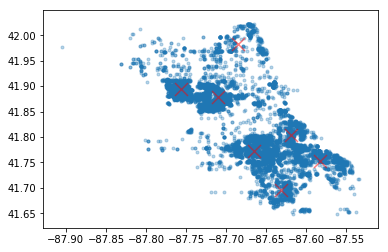

In [7]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [8]:
import datetime
df = df[(df['Date']>datetime.date(2011,1,1))] 
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
278,10510010,HZ251574,2016-05-04 19:15:00,057XX S RACINE AVE,1661,GAMBLING,GAME/DICE,PARK PROPERTY,True,False,...,16.0,68.0,19,1169299.0,1866781.0,2016,05/11/2016 03:50:55 PM,41.789957,-87.654766,"(41.78995655, -87.654766198)"
2734,10479729,HZ218796,2016-04-08 23:46:00,036XX N HARLEM AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,36.0,17.0,19,1127424.0,1923430.0,2016,04/15/2016 09:20:50 AM,41.946215,-87.807039,"(41.946214574, -87.807039472)"
2735,10517943,HZ260064,2016-05-11 11:45:00,054XX W WALTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,37.0,25.0,19,1139916.0,1905802.0,2016,05/18/2016 03:50:36 PM,41.897622,-87.761554,"(41.897621763, -87.761554236)"
2736,10518836,HZ260859,2016-05-11 21:00:00,034XX W IRVING PARK RD,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,35.0,16.0,19,1152529.0,1926373.0,2016,05/18/2016 03:50:36 PM,41.953830,-87.714683,"(41.953830299, -87.714682629)"
2737,10520278,HZ262293,2016-05-12 22:45:00,006XX N LOCKWOOD AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1140914.0,1903732.0,2016,05/19/2016 03:50:56 PM,41.891923,-87.757940,"(41.891923124, -87.757939633)"
2738,10521084,HZ262951,2016-05-13 13:45:00,048XX W FULTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1144122.0,1901498.0,2016,05/20/2016 03:54:40 PM,41.885733,-87.746214,"(41.885733129, -87.746214056)"
2739,10521262,HZ263338,2016-05-13 18:00:00,015XX E 67TH PL,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,5.0,43.0,19,1187608.0,1860538.0,2016,05/20/2016 03:54:40 PM,41.772409,-87.587832,"(41.772409096, -87.587831537)"
2740,10523160,HZ265957,2016-05-15 20:32:00,056XX S MAY ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,16.0,68.0,19,1169613.0,1867420.0,2016,05/22/2016 03:54:30 PM,41.791703,-87.653596,"(41.791703233, -87.653596326)"
2742,10524604,HZ267315,2016-05-16 19:44:00,014XX E 67TH PL,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,5.0,43.0,19,1186955.0,1860524.0,2016,05/23/2016 03:51:11 PM,41.772386,-87.590226,"(41.772386186, -87.590225656)"
2743,10528655,HZ271444,2016-05-19 18:50:00,050XX S ELIZABETH ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,16.0,61.0,19,1168843.0,1871376.0,2016,05/26/2016 03:51:03 PM,41.802576,-87.656306,"(41.802575618, -87.656305524)"


[[-87.68654787  41.98439273]
 [-87.66505945  41.77574874]
 [-87.58001445  41.75076917]
 [-87.71052735  41.87539341]
 [-87.63473974  41.70576433]
 [-87.61916525  41.79177181]
 [-87.75476194  41.88992448]]


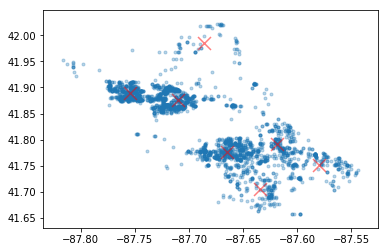

In [9]:
# Print & Plot your data
doKMeans(df)